# Import all library needed

In [1]:

%pip install openai pytest pandas python-dotenv scikit-learn tiktoken matplotlib

import openai
import pandas as pd
import pytest
import json
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
import base64
import re
import tiktoken
import matplotlib.pyplot as plt

  Using cached openai-1.52.2-py3-none-any.whl.metadata (24 kB)
  Using cached pytest-8.3.3-py3-none-any.whl.metadata (7.5 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached exceptiongroup-1.2.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached tomli-2.0.2-py3-none-any.whl.metadata (10.0 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3

Matplotlib is building the font cache; this may take a moment.


# Analyze the data provided

In [2]:
df = pd.read_json('cura-llm-training-data.json')

In [3]:
df

,question_id,task_id,question,rubric,answer,task_title,task_content
0,8b1d6474-a38a-4456-8ac2-74ff054b9d67,41f89fd8-0d25-4aa7-848c-6840f01023da,Which fin design worked best? Why?,"{""items"": [""I can explain my response"", ""I can...","""Fin designs that have three or four triangula...",Designing your rocket,Designing your rocket Building phase Th...
1,8add417a-4108-43e6-b033-4fa72ac4f709,35d95305-bc3a-461a-ba96-83063257f32d,Which planet had the fastest and slowest orbit...,"{""items"": [""I can explain why these planets ha...","""Mercury has the fastest orbit of 88 days. Thi...",The orbits of other planets,The orbits of other planets The orbits of o...
2,89edd167-18ed-40ba-93f1-93999a800097,c4c7058a-5f65-45a2-b097-30733070e4bd,"Based on your results (ie. shape, volume, and ...","{""items"": [""I can identify the three propertie...","""Exemplar AnswerSolids - shape did not change,...",What are objects made of?,What are objects made of? What affects whet...
3,8632c092-ea9f-4ba2-bdfa-d2f335c95247,cb21ad07-eed4-49a4-9d63-5e266a0b19b0,Determine the ratio of the load force to effor...,"{""items"": [""I can explain how we know this"", ""...","""The ratio of the load force to the effort for...",Forces in action - seesaws,Forces in action - seesaws Turning forces ...
4,8422d140-5d31-4933-ae45-52f380e1213a,fe99ba29-d69a-4231-8a66-badedae898b2,Describe the shape of the Earth’s orbit around...,"{""items"": [""I can explain the shape of the Ear...","""The Earth’s orbit around the Sun is an ellipt...",Earth's orbit,Earth's orbit What is an orbit? An orbi...
...,...,...,...,...,...,...,...
112,0e4305e5-9436-42e6-aa91-0d417d0e6b7b,62531e3f-7652-4a5c-b6ff-2e774b4f05a9,What type of material would you use if you wan...,"{""items"": [""I can explain my answer"", ""I can c...","""Translucent. Only some light passes through i...",Light absorption,Light absorption Struck by light What h...
113,e2ff5709-711c-487a-b4ef-032473532b2d,59c94ba6-4402-4d28-88d2-bbe2f2e8f9a0,"If you haven't already, watch this video of a ...","{""items"": [""I can explain how this is an illus...","""When a vehicle suddenly stops or collides, th...",What is Newton’s first law of motion?,What is Newton’s first law of motion? Force...
114,b1222c04-d4f6-4862-9d01-a0db711447e4,fb74d82a-43e6-4470-93ed-6f4d55e6df32,"Based on what each group started with, which g...","{""items"": [""I can correctly identify all of th...","""Group A - Regional/rural townGroup B - Smalle...",Why does liveability differ across places?,Why does liveability differ across places? ...
115,d1907f44-d617-4487-a946-64e7c75dac2a,a03055ca-23ed-485d-ae06-6b4b8b51f811,It's 1204 CE and Genghis Khan has just defeate...,"{""items"": [""I can suggest how to forge an alli...","""Students could take different approaches for ...",How did Genghis Khan unify the Mongols?,How did Genghis Khan unify the Mongols? Who...


In [4]:
print("question_id count: ",len(set(df['question_id'])))
print("question count: ",len(set(df['question'])))
print("answer count: ",len(set(df['answer'])))
print("task_id count: ",len(set(df['task_id'])))
print("task_title count: ",len(set(df['task_title'])))
print("task_content count: ",len(set(df['task_content'])))
print("rubric count: ",len(set(df['rubric'])))

question_id count:  117
question count:  117
answer count:  117
task_id count:  59
task_title count:  59
task_content count:  59
rubric count:  115


In [5]:
duplicate_rubrics = df[df.duplicated(subset=['rubric'], keep=False)]

print(duplicate_rubrics)


                             question_id  \
19  70ab1af4-12c9-4847-9efb-864ad4ed896e   
82  0f99ba55-9e0b-48c2-94ee-dabcbf7ed2ed   
96  06d8bcf5-3da2-473f-95b6-ca1c894ffc83   
97  8b7edaf3-3bfb-4281-90bd-c3656aa29b20   

                                 task_id  \
19  24bc38db-25f1-4e6f-b587-36b750356bb4   
82  24bc38db-25f1-4e6f-b587-36b750356bb4   
96  a6050fdf-1fc4-4b06-8d28-fe09e5e2f686   
97  a6050fdf-1fc4-4b06-8d28-fe09e5e2f686   

                                             question  \
19  What do these sources not tell you about ostra...   
82  Combining evidence from all the sources, what ...   
96  Look at the hypothetical pedigree diagram belo...   
97  Look at the hypothetical pedigree diagram belo...   

                                               rubric  \
19  {"items": ["Makes a claim about ostracism that...   
82  {"items": ["Makes a claim about ostracism that...   
96  {"items": ["I can explain my answer using the ...   
97  {"items": ["I can explain my answer usin

There is duplicated rubric,therefore check whether there is duplicate row from the data

In [6]:
df.iloc[19]['question']

'What do these sources not tell you about ostracism?'

In [7]:
df.iloc[82]['question']

'Combining evidence from all the sources, what do they tell you about ostracism?'

In [8]:
df.iloc[96]['question']

'Look at the hypothetical pedigree diagram below. It shows the inheritance of skin colour in aliens. Skin colour is inherited as an autosomal trait. Green (G) is dominant to orange (g).&nbsp;Are the affected aliens displaying the dominant or recessive trait? Give a specific reason for your answer with an example from the pedigree diagram'

In [9]:
df.iloc[97]['question']

'Look at the hypothetical pedigree diagram below. It shows the inheritance of horns in aliens. Horns are inherited as an autosomal trait. Horns (H) are dominant to no horns (h).&nbsp;Are the affected aliens displaying the dominant or recessive trait? Give a specific reason for your answer with an example from the pedigree diagram'

After check, all the data provided seems normal.

# Get the api key from .env file

In [10]:
# Load .env file
load_dotenv()

# From .env file to get the OpenAI API Key
api_key = os.getenv("OPENAI_API_KEY")

# Fine tuning

## Convert the data to fine tunning format

In [11]:
# Read the original data
with open("cura-llm-training-data.json", "r") as file:
    data = json.load(file)

# convert to chat-formatted data
with open("data/chat_fine_tuning_data.jsonl", "w") as output_file:
    for entry in data:
        # Create chat-formatted data message
        messages = [
            {"role": "system", "content": "You are an AI assistant designed to generate exemplar answers for educational purposes. Your task is to generate exemplar answers based on a provided student task context, question, and assessment rubric."},
            {"role": "user", "content": f"Task Title: {entry['task_title']}\nTask Content: {entry['task_content']}\nQuestion: {entry['question']}\nRubric: {entry['rubric']}"},
            {"role": "assistant", "content": entry['answer']}
        ]
        
        # convert to jsonl file
        jsonl_entry = {"messages": messages}
        output_file.write(json.dumps(jsonl_entry) + "\n")



## Train Test Validation Split

Using the ratio 7:1.5:1.5 to divide the original data into train, test and validation dataset for fine tunning

In [12]:
# # Loading the original data and shuffle the dataset
# with open("data/chat_fine_tuning_data.jsonl", "r") as file:
#     data = [json.loads(line) for line in file]

# # split the data into train test validation
# train_data, temp_data = train_test_split(data, test_size=0.3, random_state=1025)
# validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=1025)

# # save the split data
# with open("data/finetuneData/train_data.jsonl", "w") as train_file:
#     for entry in train_data:
#         train_file.write(json.dumps(entry) + "\n")

# with open("data/finetuneData/validation_data.jsonl", "w") as validation_file:
#     for entry in validation_data:
#         validation_file.write(json.dumps(entry) + "\n")

# with open("data/finetuneData/test_data.jsonl", "w") as test_file:
#     for entry in test_data:
#         test_file.write(json.dumps(entry) + "\n")

## Start Fine Tunning

In [13]:
from openai import OpenAI
client = OpenAI()

client.api_key = api_key

calculate the token may used for training the model

In [14]:
def count_tokens_in_jsonl(file_path, tokenizer):
    total_tokens = 0
    with open(file_path, 'r', encoding='utf-8') as f:
        str = ''
        for line in f:
            data = json.loads(line)
            prompt = data['messages'][0]['content']
            user = data['messages'][1]['content']
            asistant = data['messages'][2]['content']
            str = prompt + user + asistant
            tokens = tokenizer.encode(str)
            total_tokens += len(tokens)
    return total_tokens

# Tarin and validation file path
train_file_path = "data/finetuneData/train_data.jsonl"
validation_file_path = "data/finetuneData/validation_data.jsonl"

# Using tokenization
tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")

# calculate the token count
train_token_count = count_tokens_in_jsonl(train_file_path, tokenizer)
validation_token_count = count_tokens_in_jsonl(validation_file_path, tokenizer)

# print out the token count
print(f"The number of trained dataset token number: {train_token_count}")
print(f"The number of validation dataset token number: {validation_token_count}")
print(f"The total estimate number of token number be used: {train_token_count + validation_token_count}")

The number of trained dataset token number: 111767
The number of validation dataset token number: 17730
The total estimate number of token number be used: 129497


### Upload the file

In [15]:

# upload the train and validation data to OpenAI
# response_train = client.files.create(file=open("data/finetuneData/train_data.jsonl", "rb"), purpose='fine-tune')
# response_valid = client.files.create(file=open("data/finetuneData/validation_data.jsonl", "rb"), purpose='fine-tune')


In [16]:
# print("Uploaded training file ID:", response_train.id)
# print("Uploaded validation file ID:", response_valid.id)

### start Fine Tunning

In [17]:

# # Create a fine-tuning task
# response_fine_tune_v1 = client.fine_tuning.jobs.create(
#     training_file=response_train.id,
#     validation_file=response_valid.id,
#     model="gpt-4o-mini-2024-07-18",
#     hyperparameters={
#     "n_epochs":2
#   }
# )


In [18]:
# Get the fine-tune task ID
# fine_tune_job_id = response_fine_tune_v1.id

fine_tune_job_id = "ftjob-HItchoh2yNrQxi5lPJ4o0APq"

print("Fine-tuning job ID:", fine_tune_job_id)

Fine-tuning job ID: ftjob-HItchoh2yNrQxi5lPJ4o0APq


### Check the Fine tunning task

In [19]:
print(client.fine_tuning.jobs.retrieve(fine_tune_job_id).status)

succeeded


In [20]:
print(client.fine_tuning.jobs.retrieve(fine_tune_job_id))

FineTuningJob(id='ftjob-HItchoh2yNrQxi5lPJ4o0APq', created_at=1729871299, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal::AMGvcji0', finished_at=1729871650, hyperparameters=Hyperparameters(n_epochs=2, batch_size=1, learning_rate_multiplier=1.8), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-1tLV13qTuF8etS5dptzigZgs', result_files=['file-CtR1HdBjS6gQL8CWz50nA1Vv'], seed=1296138184, status='succeeded', trained_tokens=225900, training_file='file-yOCQ3P6liWemIXBOpy0wemMP', validation_file='file-CBjO3IqPHfIb6avZGg7JWQPi', estimated_finish=None, integrations=[], user_provided_suffix=None)


In [21]:
result_file_id = client.fine_tuning.jobs.retrieve(fine_tune_job_id).result_files
print(result_file_id[0])

file-CtR1HdBjS6gQL8CWz50nA1Vv


In [22]:
client.files.content('file-CtR1HdBjS6gQL8CWz50nA1Vv')

The actual token used for training

In [23]:
print(client.fine_tuning.jobs.retrieve(fine_tune_job_id).trained_tokens)

225900


### Check the training log

In [24]:


# # Retrieve the response from the client
# response_log = client.files.content('file-CtR1HdBjS6gQL8CWz50nA1Vv')

# # Get the response content (this should give you the binary content)
# response_content_log = response_log.read()

# # If the content is Base64 encoded, decode it:
# # Assuming the content is Base64 encoded, decode it into original bytes
# decoded_bytes = base64.b64decode(response_content_log)

# # Write the decoded bytes to the file
# with open('retrieved_file.csv', 'wb') as file:
#     file.write(decoded_bytes)

In [25]:
training_log = pd.read_csv('retrieved_file.csv')
training_log

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
0,1,4.42250,0.40909,NaN,NaN
1,2,2.96151,0.44898,NaN,NaN
2,3,2.54146,0.49733,NaN,NaN
3,4,2.84433,0.55319,NaN,NaN
4,5,2.18460,0.55072,NaN,NaN
...,...,...,...,...,...
157,158,1.48344,0.65957,NaN,NaN
158,159,0.95391,0.79167,NaN,NaN
159,160,0.87577,0.77551,1.6071,0.61905
160,161,1.32539,0.60000,NaN,NaN


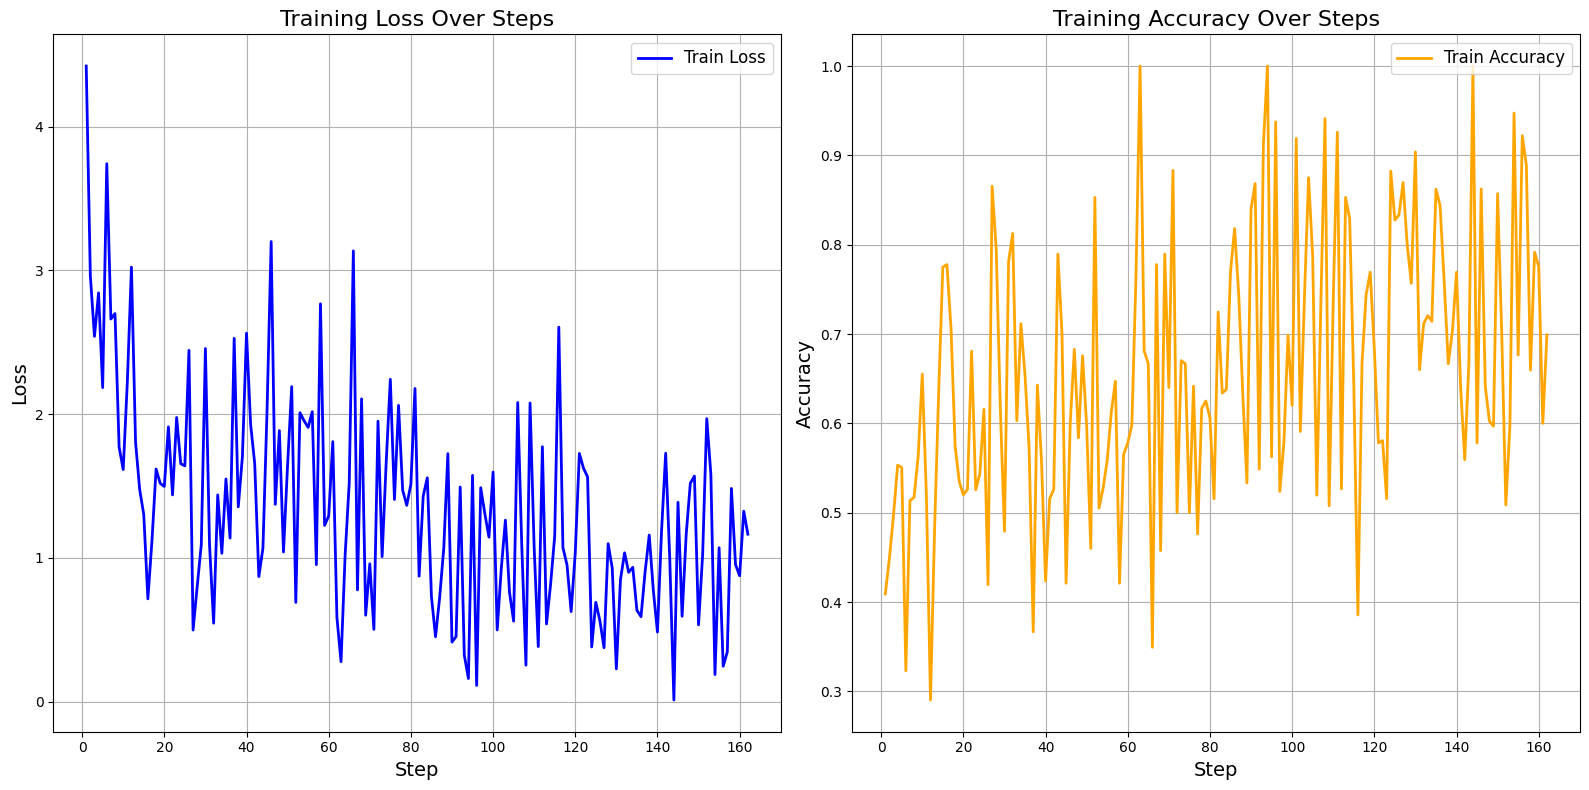

In [26]:
# Plotting train loss and train accuracy over steps
plt.figure(figsize=(16, 8))

# Train Loss - Using blue color
plt.subplot(1, 2, 1)
plt.plot(training_log['step'], training_log['train_loss'], label='Train Loss', color='blue', linewidth=2)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss Over Steps', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Train Accuracy - Using orange color
plt.subplot(1, 2, 2)
plt.plot(training_log['step'], training_log['train_accuracy'], label='Train Accuracy', color='orange', linewidth=2)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training Accuracy Over Steps', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

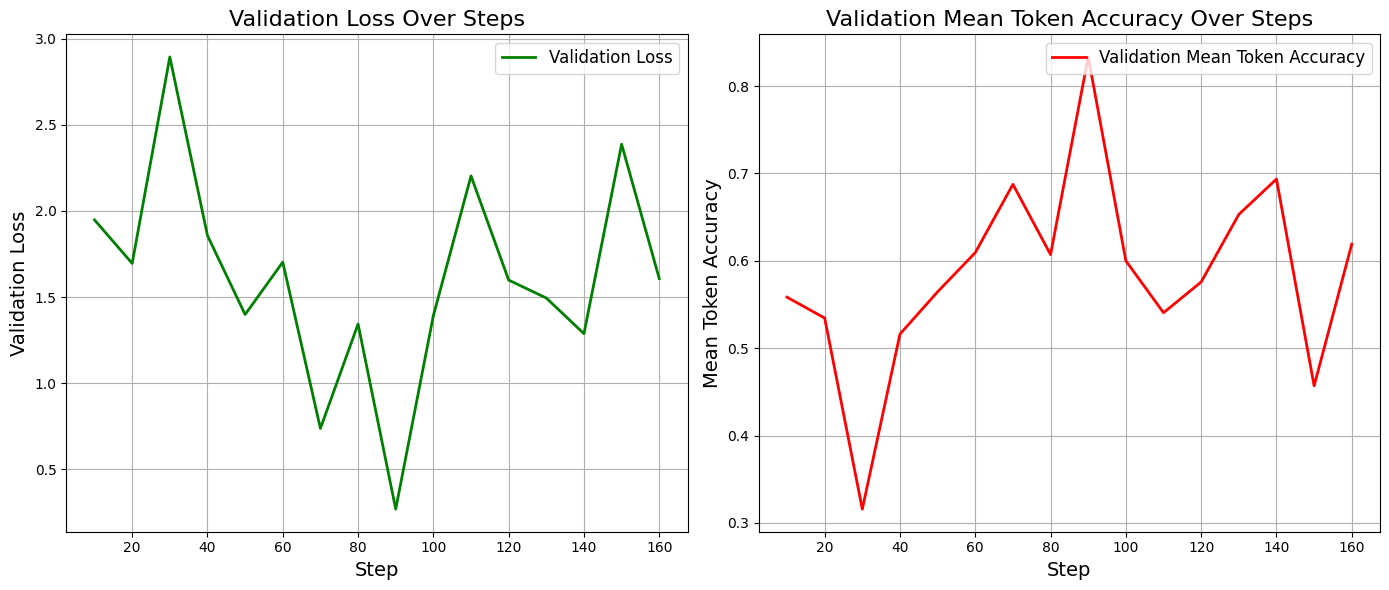

In [27]:
# Filtering out rows where validation data is not NaN
valid_log = training_log.dropna(subset=['valid_loss', 'valid_mean_token_accuracy'])

# Plotting only the validation metrics for a clearer analysis
plt.figure(figsize=(14, 6))

# Validation Loss - Using green color
plt.subplot(1, 2, 1)
plt.plot(valid_log['step'], valid_log['valid_loss'], label='Validation Loss', color='green', linewidth=2)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.title('Validation Loss Over Steps', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Validation Mean Token Accuracy - Using red color
plt.subplot(1, 2, 2)
plt.plot(valid_log['step'], valid_log['valid_mean_token_accuracy'], label='Validation Mean Token Accuracy', color='red', linewidth=2)
plt.xlabel('Step', fontsize=14)
plt.ylabel('Mean Token Accuracy', fontsize=14)
plt.title('Validation Mean Token Accuracy Over Steps', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


# Prompt Engineering

## Generate the prompt

In [66]:
prompt_message = f''' Generate exemplar answers for educational purposes based on a provided student task context, question, and rubric. The exemplar should:

Answer the question, using the information given in the context.
Meet the assessment rubric criteria for quality and correctness.
Be a reliable reference for teachers when evaluating students.
Be clear, concise, easy to follow and short(max_completion_tokens = 260).
'''


## Estimate max token number

 The maximum token generated from the LLM should be:

In [67]:


def word_count_token(text):
    tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")  
    tokens = tokenizer.encode(text)
    return len(tokens)


min_count = df['answer'].apply(word_count_token).min()
max_count = df['answer'].apply(word_count_token).max()

# print out the min and max token count in answers
print("min count: ", min_count)
print("max count: ", max_count)




min count:  3
max count:  255


There is one special answer: The minimum token count inside the dataset's answer part

In [55]:
# Find the index of the row with the minimum token count
min_index = df['answer'].apply(word_count_token).idxmin()

min_row = df.loc[min_index]

print("The minimum token count row:\n")
print(min_row)


The minimum token count row:

question_id                  2f8d9ef4-3fb1-4b81-99e3-989bbdd8ffdf
task_id                      0a0d4334-c400-4f04-b38c-0b5715232731
question        Draw a diagram of the two steps you used to se...
rubric          {"items": ["I can include all of the labels in...
answer                                                   "&nbsp;"
task_title                                 Sieving and filtration
task_content    Sieving and filtration    Sieving     Sieving ...
Name: 59, dtype: object


In [56]:
# Find the index of the row with the maximum token count
max_index = df['answer'].apply(word_count_token).idxmax()

max_row = df.loc[max_index]

print("The maximum token count row:\n")
print(max_row)

The maximum token count row:

question_id                  d1907f44-d617-4487-a946-64e7c75dac2a
task_id                      a03055ca-23ed-485d-ae06-6b4b8b51f811
question        It's 1204 CE and Genghis Khan has just defeate...
rubric          {"items": ["I can suggest how to forge an alli...
answer          "Students could take different approaches for ...
task_title                How did Genghis Khan unify the Mongols?
task_content    How did Genghis Khan unify the Mongols?    Who...
Name: 115, dtype: object


# For generating the answer from test data

In [32]:
with open("data/finetuneData/test_data.jsonl", "r") as file:
    test_data = [json.loads(line) for line in file]

In [33]:
test_data[0]['messages'][1]

{'role': 'user',
 'content': 'Task Title: Evaporating in cooking\nTask Content: Evaporating in cooking    Evaporation    Evaporating involves using heat to change a liquid into a gas. The heat causes the liquid\'s molecules to vibrate faster and faster until they break free of the rest of the molecules and float away as a gas.  In cooking, we usually use evaporation to reduce the amount of water in a liquid. Words like  simmering  and  thickening  usually mean using heat to cook a liquid - often a sauce - for a long time so that some of the liquid evaporates. When this happens, you are left with a thicker, richer sauce.  Although it might seem like evaporating a liquid makes it disappear, this is actually an example of a  reversible change . When we evaporate liquid, we can catch or trap the water vapour (for example, by putting a lid over the pot/pan). This vapour will  condense  as it cools until it becomes a liquid again.  &nbsp;    Experimental protocol    Watch your teacher demons

In [68]:
def count_tokens(text, model="gpt-4o-mini"):
    tokenizer = tiktoken.encoding_for_model(model)
    tokens = tokenizer.encode(text)
    return len(tokens)


# Calculate the number of tokens input into the model
test_token_count = 0

for i in range(0, len(test_data)):
    test_token_count += count_tokens(prompt_message+test_data[i]['messages'][1]['content'])
    test_token_count += 260

print(f"The total count of token used in gpt-4o-mini could be {test_token_count}")


The total count of token used in gpt-4o-mini could be 22098


Since in this project, I will compare the "gpt-4o-mini" and my fine tunned model(Based on "gpt-4o-mini")

In [69]:
print(f"The final total count of token used in two models could be {test_token_count * 2}")


The final total count of token used in two models could be 44196


## Start Genrate the test answer

Make sure my Fine Tunned Models could work

In [36]:
from openai import OpenAI
client = OpenAI()

client.models.list()

SyncPage[Model](data=[Model(id='gpt-4o-mini', created=1721172741, object='model', owned_by='system'), Model(id='ft:gpt-4o-mini-2024-07-18:personal::AMGvcji0', created=1729871652, object='model', owned_by='user-5oqkyaaw32lkpj4pjc0qotwm'), Model(id='ft:gpt-4o-mini-2024-07-18:personal::AMGvbwO7:ckpt-step-81', created=1729871652, object='model', owned_by='user-5oqkyaaw32lkpj4pjc0qotwm')], object='list')

In [39]:
test_data[0]['messages'][1]['content']

'Task Title: Evaporating in cooking\nTask Content: Evaporating in cooking    Evaporation    Evaporating involves using heat to change a liquid into a gas. The heat causes the liquid\'s molecules to vibrate faster and faster until they break free of the rest of the molecules and float away as a gas.  In cooking, we usually use evaporation to reduce the amount of water in a liquid. Words like  simmering  and  thickening  usually mean using heat to cook a liquid - often a sauce - for a long time so that some of the liquid evaporates. When this happens, you are left with a thicker, richer sauce.  Although it might seem like evaporating a liquid makes it disappear, this is actually an example of a  reversible change . When we evaporate liquid, we can catch or trap the water vapour (for example, by putting a lid over the pot/pan). This vapour will  condense  as it cools until it becomes a liquid again.  &nbsp;    Experimental protocol    Watch your teacher demonstrate how evaporation can be 

In [ ]:
test_data[0]['messages'][1]['content']

In [74]:
def generate_answer_fine_tune(input_question):
    try:
        # context for GPT
        prompt = prompt_message
        question = input_question
        response = client.chat.completions.create(
            model='ft:gpt-4o-mini-2024-07-18:personal::AMGvcji0',
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": question}
            ],
            max_completion_tokens = 260,
            temperature=0.3
        )
        answer = response.choices[0].message.content
        return answer
    except Exception as e:
        print(f"Error generating answer: {e}")
        return f"There was an error generating the answer: {e}"

In [75]:
# this_fine_tunned_answer = generate_answer_fine_tune(test_data[4]['messages'][1]['content'])
# print(this_fine_tunned_answer)

"Trypsin broke down the protein into smaller molecules called peptides. This was shown by the biuret test which turned purple when it came into contact with the peptides"


In [76]:
def generate_answer_original(input_question):
    try:
        # context for GPT
        prompt = prompt_message
        question = input_question
        response = client.chat.completions.create(
            model='gpt-4o-mini',
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": question}
            ],
            max_completion_tokens = 260,
            temperature=0.3
        )
        answer = response.choices[0].message.content
        return answer
    except Exception as e:
        print(f"Error generating answer: {e}")
        return f"There was an error generating the answer: {e}"

In [77]:
# this_original_answer = generate_answer_original(test_data[4]['messages'][1]['content'])
# print(this_original_answer)

In the trypsin experiment, the results showed a significant decrease in the concentration of intact proteins and an increase in the concentration of smaller molecules, specifically peptides. This suggests that trypsin effectively catalyzed the breakdown of proteins into peptides. The presence of peptides can be confirmed through various methods, such as using colorimetric assays that indicate peptide formation. Additionally, the time taken for the reaction to occur supports the idea that trypsin acts as a catalyst, speeding up the breakdown process. Overall, the experimental results provide strong evidence that trypsin is responsible for converting proteins into smaller peptide fragments, demonstrating its crucial role in protein digestion.


In [79]:
# tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")
# len((tokenizer.encode(this_original_answer)))

130

In [87]:
# import csv
# import time

# # Define the CSV file path
# output_csv_path = "data/generated/generated_answers.csv"

# # Open the CSV file for writing
# with open(output_csv_path, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(["official_answer", "fine_tunned_answer", "4o_mini_answer"])

#     # Iterate over the test data
#     i = 0
#     for line in test_data:
#         try:
#             official_answer = line['messages'][2]['content']
#             question = line['messages'][1]['content']

#             print(f"Start generating answers for question: {i}")

#             # Generate answers using the two functions
#             fine_tunned_answer = generate_answer_fine_tune(question)
#             time.sleep(1)  
#             mini_answer = generate_answer_original(question)
#             time.sleep(1)  

#             # Write the row to the CSV file
#             writer.writerow([official_answer, fine_tunned_answer, mini_answer])

#             i+=1

#         except Exception as e:
#             print(f"Error processing line: {e}")
#             continue

# print(f"Answers have been generated and stored in {output_csv_path}")

Start generating answers for question: 0
Start generating answers for question: 1
Start generating answers for question: 2
Start generating answers for question: 3
Start generating answers for question: 4
Start generating answers for question: 5
Start generating answers for question: 6
Start generating answers for question: 7
Start generating answers for question: 8
Start generating answers for question: 9
Start generating answers for question: 10
Start generating answers for question: 11
Start generating answers for question: 12
Start generating answers for question: 13
Start generating answers for question: 14
Start generating answers for question: 15
Start generating answers for question: 16
Start generating answers for question: 17
Answers have been generated and stored in data/generated/generated_answers.csv


In [89]:
test_answer_df = pd.read_csv('data/generated/generated_answers.csv')

In [90]:
test_answer_df

,official_answer,fine_tunned_answer,4o_mini_answer
0,"""The liquid reduced because it evaporated. It ...","""The liquid in the pan reduced as it evaporate...",The liquid in the pan reduced due to the proce...
1,"""Student finger, rock or stone, wood, thick fa...","""Aluminum foil and plastic wrap. We could feel...",Exemplar Answer:\n\nThe opaque objects that ab...
2,"""The ova (eggs) or ovules are protected from d...","""It is important that the ovules are found in ...",The ovules are located within the ovary of the...
3,"""My conclusions would have been different, as ...","""It would have been that ostracism was a fair ...","If I had only examined Source 1, my conclusion..."
4,"""This experiment uses milk which contains the ...","""Trypsin breaks down proteins into smaller mol...","In the trypsin experiment, the results indicat..."
5,"""Tension force. Tension force = weight force. ...","""Tension force. Tension force = weight of mass...",The force present in the string when tied to t...
6,"""Fin designs that have three or four triangula...","""The fin design with the most surface area wor...",The fin design that worked best was the triang...
7,"""Oobleck acts like a solid if it has very litt...","""Oobleck behaves like a liquid when it is left...",Oobleck exhibits properties of both a liquid a...
8,"""The best results were when we used two or thr...","""Using two mirrors gave the brightest light sp...",The method that gave the brightest light spot ...
9,"""Mars, Earth’s moon, Europa, Enceladus, and Ti...","""Earth's moon, Mars, Europa, Enceladus and Tit...",The most likely places for us to live on in ou...


In [95]:
token_answer_used_in_test = 0

for i in range(len(test_answer_df)):
    fine_tunned_answer = test_answer_df.iloc[i]['fine_tunned_answer']
    mini_answer = test_answer_df.iloc[i]['4o_mini_answer']

    fine_tunned_tokens = count_tokens(fine_tunned_answer)
    mini_tokens = count_tokens(mini_answer)

    token_answer_used_in_test += fine_tunned_tokens + mini_tokens

print(f"The total generated token used in the test data could be {token_answer_used_in_test}")
    

The total generated token used in the test data could be 4302


## Start Generate the train and validation part(18 answers) 

In [97]:
with open("data/finetuneData/train_data.jsonl", "r") as file:
    train_data = [json.loads(line) for line in file]

In [98]:
with open("data/finetuneData/validation_data.jsonl", "r") as file:
    validation_data = [json.loads(line) for line in file]

### Estimate the token needed for the train and validation part

In [100]:
def count_tokens_in_jsonl_train_validation(file_path, tokenizer):
    total_tokens = 0
    i = 0
    with open(file_path, 'r', encoding='utf-8') as f:
        str = ''
        for line in f:
            if i == 18:
                break
            data = json.loads(line)
            user = data['messages'][1]['content']
            str = user + prompt_message
            tokens = tokenizer.encode(str)
            total_tokens += len(tokens) + 260
            i+=1
    return total_tokens

# Tarin and validation file path
train_file_path = "data/finetuneData/train_data.jsonl"
validation_file_path = "data/finetuneData/validation_data.jsonl"

# Using tokenization
tokenizer = tiktoken.encoding_for_model("gpt-4o-mini")

# calculate the token count for generate the answers
train_token_count_generate_answers = count_tokens_in_jsonl_train_validation(train_file_path, tokenizer)
validation_token_count_generate_answers = count_tokens_in_jsonl_train_validation(validation_file_path, tokenizer)

# print out the token count
print(f"The number of trained dataset token number for generating the answers: {train_token_count_generate_answers}")
print(f"The number of validation dataset token number for generating the answers: {validation_token_count_generate_answers}")
print(f"The total estimate number of token number be used for generating the answers: {(train_token_count_generate_answers + validation_token_count_generate_answers)*2}")

The number of trained dataset token number for generating the answers: 23331
The number of validation dataset token number for generating the answers: 22171
The total estimate number of token number be used for generating the answers: 91004


### Get the answer from Open API model

In [104]:

# import csv
# import time

# # Define the CSV file path
# output_csv_path = "data/generated/generated_train_answers.csv"

# # Open the CSV file for writing
# with open(output_csv_path, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(["official_answer", "fine_tunned_answer", "4o_mini_answer"])

#     # Iterate over the test data
#     i = 0
#     for line in train_data:
#         try:
#             if (i==18):
#                 break

#             official_answer = line['messages'][2]['content']
#             question = line['messages'][1]['content']

#             print(f"Start generating answers for question(train dataset): {i}")

#             # Generate answers using the two functions
#             fine_tunned_answer = generate_answer_fine_tune(question)
#             time.sleep(1)  
#             mini_answer = generate_answer_original(question)
#             time.sleep(1)  

#             # Write the row to the CSV file
#             writer.writerow([official_answer, fine_tunned_answer, mini_answer])

#             i+=1

#         except Exception as e:
#             print(f"Error processing line: {e}")
#             continue

# print(f"Answers have been generated and stored in {output_csv_path}")

Start generating answers for question(train dataset): 0
Start generating answers for question(train dataset): 1
Start generating answers for question(train dataset): 2
Start generating answers for question(train dataset): 3
Start generating answers for question(train dataset): 4
Start generating answers for question(train dataset): 5
Start generating answers for question(train dataset): 6
Start generating answers for question(train dataset): 7
Start generating answers for question(train dataset): 8
Start generating answers for question(train dataset): 9
Start generating answers for question(train dataset): 10
Start generating answers for question(train dataset): 11
Start generating answers for question(train dataset): 12
Start generating answers for question(train dataset): 13
Start generating answers for question(train dataset): 14
Start generating answers for question(train dataset): 15
Start generating answers for question(train dataset): 16
Start generating answers for question(tra

In [105]:

# import csv
# import time

# # Define the CSV file path
# output_csv_path = "data/generated/generated_validate_answers.csv"

# # Open the CSV file for writing
# with open(output_csv_path, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(["official_answer", "fine_tunned_answer", "4o_mini_answer"])

#     # Iterate over the test data
#     i = 0
#     for line in validation_data:
#         try:
#             if (i==18):
#                 break

#             official_answer = line['messages'][2]['content']
#             question = line['messages'][1]['content']

#             print(f"Start generating answers for question (validation dataset): {i}")

#             # Generate answers using the two functions
#             fine_tunned_answer = generate_answer_fine_tune(question)
#             time.sleep(1)  
#             mini_answer = generate_answer_original(question)
#             time.sleep(1)  

#             # Write the row to the CSV file
#             writer.writerow([official_answer, fine_tunned_answer, mini_answer])

#             i+=1

#         except Exception as e:
#             print(f"Error processing line: {e}")
#             continue

# print(f"Answers have been generated and stored in {output_csv_path}")

Start generating answers for question (validation dataset): 0
Start generating answers for question (validation dataset): 1
Start generating answers for question (validation dataset): 2
Start generating answers for question (validation dataset): 3
Start generating answers for question (validation dataset): 4
Start generating answers for question (validation dataset): 5
Start generating answers for question (validation dataset): 6
Start generating answers for question (validation dataset): 7
Start generating answers for question (validation dataset): 8
Start generating answers for question (validation dataset): 9
Start generating answers for question (validation dataset): 10
Start generating answers for question (validation dataset): 11
Start generating answers for question (validation dataset): 12
Start generating answers for question (validation dataset): 13
Start generating answers for question (validation dataset): 14
Start generating answers for question (validation dataset): 15
St